In [4]:
# Problem Set 01
1. Name: Charavee Basnet Chettri
1. Field that you're interested in applying TS and forecasting to (ecology, econ, weather, etc): econ, ecology

SyntaxError: unterminated string literal (detected at line 3) (1272513780.py, line 3)

# Obtain a CSV of time series data
1. By whatever means, get a `.csv` file of time series data relating to any topic: ecological, financial, etc.
1. There should be at least three variables of data
1. If you download from the web, include a link. If you use ChatGPT, include a link to your shared search

##### Where I got the data
1. data: https://www.zillow.com/research/data/ 
This particular dataset can be found under 'LIST AND SALE PRICES' named 'Median List Price (Raw, All Homes, Weekly' for geography 'Metro & US'.
Brief information: The dataset has the median list price for homes in cities. This is a raw data set. The data is recorded in a weekly frequency. The data ranges from 2018 to the present. 

In [6]:
import pandas as pd

## data manipulation

data = pd.read_csv("mlp_week.csv")
data_drop = data.drop(columns=['RegionID', 'RegionType', 'StateName'])

#pivoting data so that dates are in rows
data_long = pd.melt (data_drop, 
                     id_vars=['SizeRank','RegionName'],
                     var_name= 'date',
                     value_name= 'md_lp')

#turn dates into datetime objects and set them as index
data_long['Date'] = pd.to_datetime(data_long['date'])
data_long.set_index('Date', inplace=True)

data_filtered = data_long[(data_long['SizeRank'] == 1) |
                          (data_long['SizeRank'] == 2) |
                          (data_long['SizeRank'] == 3) |
                          (data_long['SizeRank'] == 937)]

#pivot so that each variable is a city, state
data_wide = data_filtered.pivot(index = None,
                                columns = 'RegionName',
                                values = 'md_lp')

# 1. Time series plots
1. Plot the raw time series data
1. Identify any time series patterns
1. Identify any interesting trends insight

In [7]:
import matplotlib.pyplot as plt

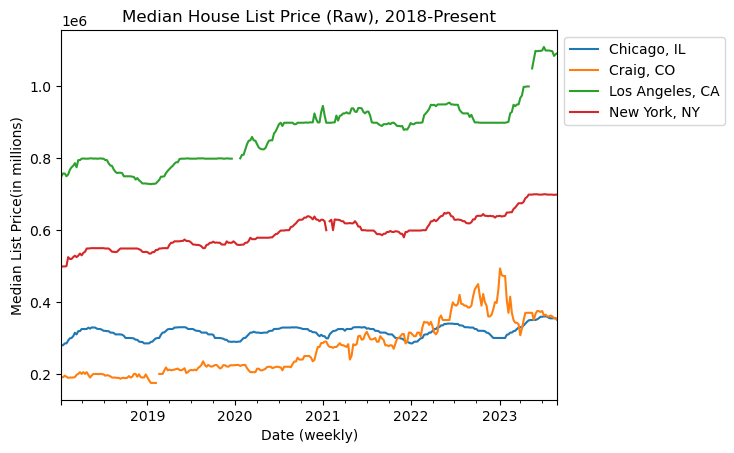

In [8]:
data_wide.plot()
plt.title('Median House List Price (Raw), 2018-Present')
plt.xlabel('Date (weekly)')
plt.ylabel('Median List Price(in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### Observations
1. The four cities from four different states were chosen according to their population size rank. Craig, CO (i.e. rank 937) with the intention to contextualize the median list prices of the top 3 cities by size.
2. In the given time frame, Los Angeles, CA sees the highest median house list prices touching approximately 1M dollars, followed by New York, NY. Furthermore, there's a steep rise in prices post 2023 (which could due to the economic situation).
3. The median list prices in Chicago, IL, show consistency over the time period. It is interesting to note that there may be a slight seasonal pattern. We can see slight dips in prices at the end of each year.
4. Median list prices see an uptick in Craig, CO after the 2020. This trend could be correlated with the onset of the Covid-19 pandemic. 
5. Perhaps, regardless of the population, median home prices tends to increase over time, if not stay consistent. 

Text(0, 0.5, '% Change')

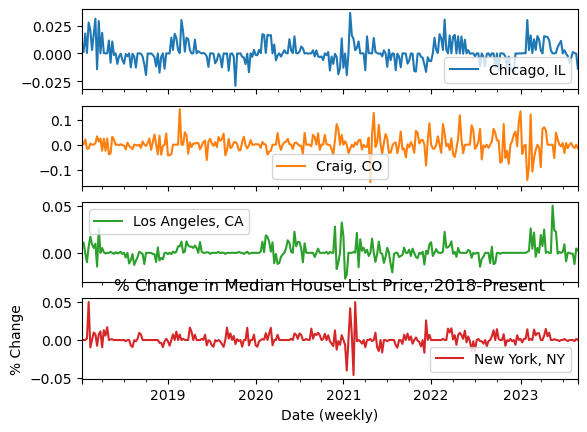

In [9]:
## Thought exercise, when graphing period-to-period change for each city.
chng = data_wide.pct_change()
chng.plot(subplots = True)
plt.title('% Change in Median House List Price, 2018-Present')
plt.xlabel('Date (weekly)')
plt.ylabel('% Change')

# 2. Scatterplots
1. Plot a 3x3 grid of all pairwise scatterplots
1. Identify any interesting trends insight

In [10]:
import seaborn as sns

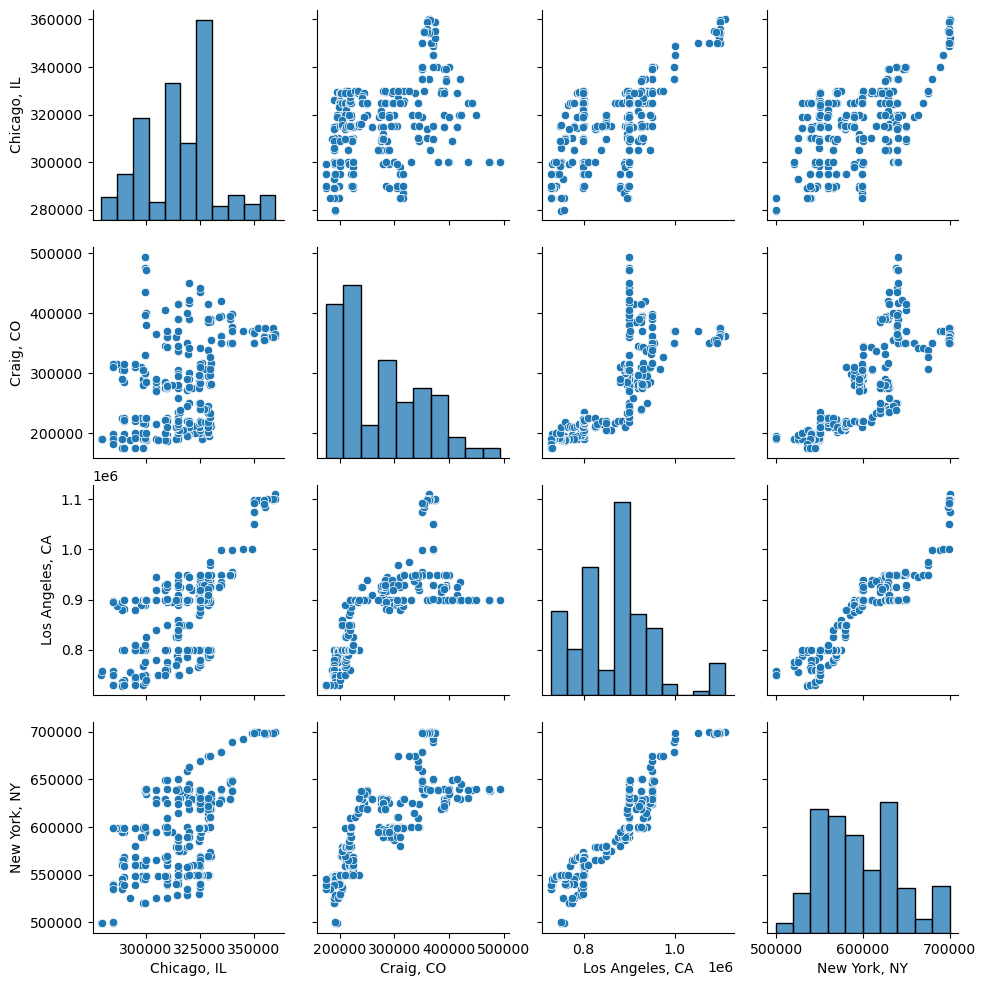

In [11]:
sns.pairplot(data_wide, diag_kind='auto', markers=None)

#### Observations
1. On average, there is a positive and stronger correlation between the variables. In other words, the median list price for houses in New York, NY increases with those in Los Angeles, CA. It is intuitive, because in addition to other demand and supply-side factors like inflation etc, the value and/or price of house or such property increases over time. (Hence, it is seen as an investment opportunity too). 
2. There are some missing values, as seen by the time series visualizations as well. 
3. The correlation between median list price levels are much stronger than among changes in median list prices. (graph below)

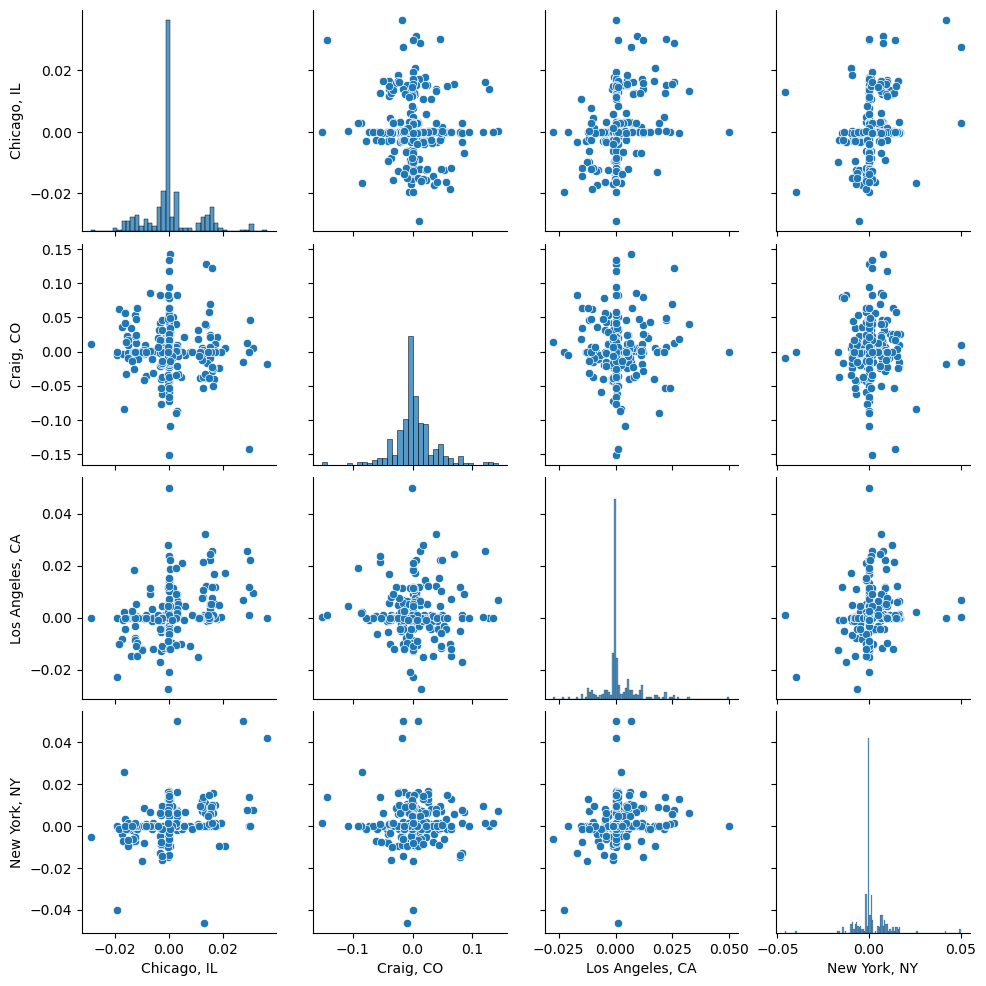

In [12]:
## Thought Exercise 

sns.pairplot(chng, diag_kind='auto', markers=None)

# 3. Lag & autocorrelation plots
1. Plot a lag plot of any variable of your choice to *visualize* its relationship to itself in the past. Use a maximum $k$ value of your choice
1. Plot an autocorrelation plot of this same variable to *quantify* its relationship to itself in the past. Use a maximum $k$ value of your choice

In [13]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

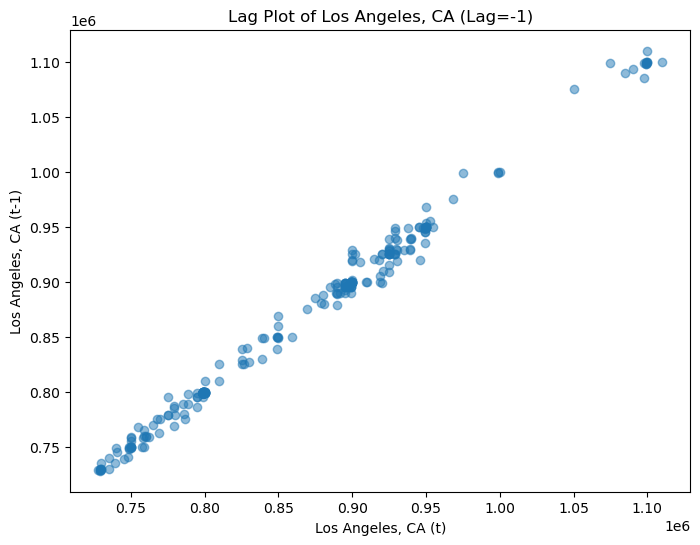

In [14]:
#1 week past lag
var = 'Los Angeles, CA'
lag = -1
data_wide['lagged'] = data_wide[var].shift(lag)

# Create a lag plot
plt.figure(figsize=(8, 6))
plt.scatter(data_wide[var], data_wide['lagged'], alpha=0.5)
plt.title(f'Lag Plot of {var} (Lag={lag})')=
plt.xlabel(f'{var} (t)')
plt.ylabel(f'{var} (t{lag})')
plt.show()

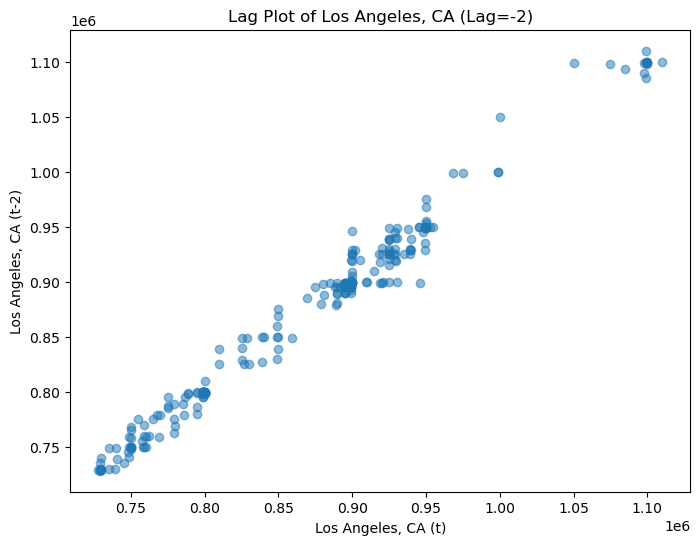

In [15]:
#2 week past lag
var = 'Los Angeles, CA'
lag = -2

data_wide['lagged'] = data_wide[var].shift(lag)

# Create a lag plot
plt.figure(figsize=(8, 6))
plt.scatter(data_wide[var], data_wide['lagged'], alpha=0.5)
plt.title(f'Lag Plot of {var} (Lag={lag})')
plt.xlabel(f'{var} (t)')
plt.ylabel(f'{var} (t{lag})')
plt.show()

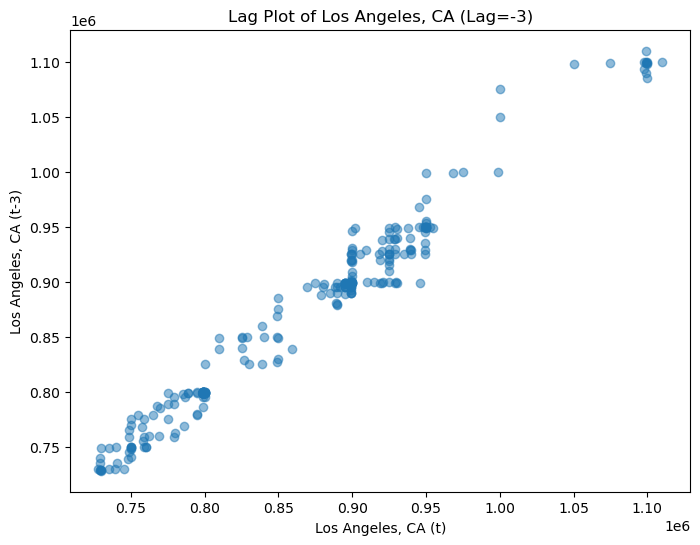

In [16]:
#4 week past lag
var = 'Los Angeles, CA'
lag = -3

data_wide['lagged'] = data_wide[var].shift(lag)

# Create a lag plot
plt.figure(figsize=(8, 6))
plt.scatter(data_wide[var], data_wide['lagged'], alpha=0.5)
plt.title(f'Lag Plot of {var} (Lag={lag})')
plt.xlabel(f'{var} (t)')
plt.ylabel(f'{var} (t{lag})')
plt.show()

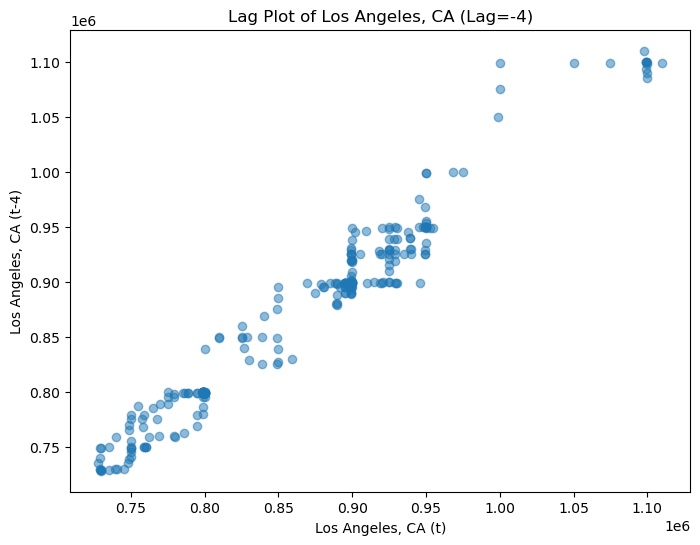

In [17]:
#4 week past lag
var = 'Los Angeles, CA'
lag = -4

data_wide['lagged'] = data_wide[var].shift(lag)

# Create a lag plot
plt.figure(figsize=(8, 6))
plt.scatter(data_wide[var], data_wide['lagged'], alpha=0.5)
plt.title(f'Lag Plot of {var} (Lag={lag})')
plt.xlabel(f'{var} (t)')
plt.ylabel(f'{var} (t{lag})')
plt.show()

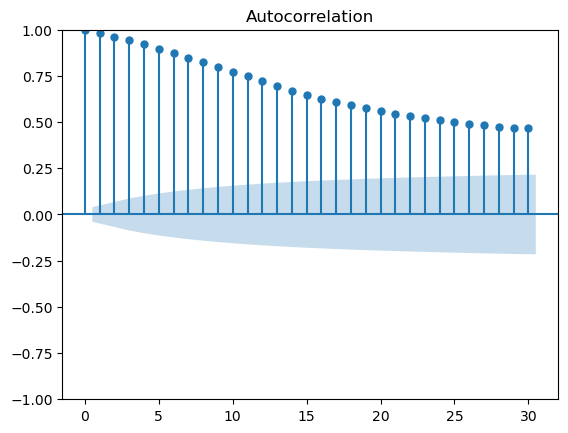

In [136]:
#plt.figure(figsize=(8, 6))
plot_acf(data_wide['Los Angeles, CA'].dropna(), alpha=0.5, lags=30)
plt.show()

#### Observations
1. We see momentum from our lag plot and autocorrelation, where the median list prices moves in the same direction as the lagged value. In this case that is positive and upwards. 

In [129]:
## Thought exercise 

autocorr1 = data_wide['Los Angeles, CA'].autocorr()
autocorr2 = chng['Los Angeles, CA'].autocorr()

print (autocorr1, '>', autocorr2)

0.9967370507624936 > 0.1934229694617877


#### Things to potentially further explore
1. I would forward fill the missing values for some variables (rather than dropping the NA afterwards)
2. I would compare with the prices of rentals (hence, demand) since they are sectors of the same industry (to an extent).
3. I would compare with income of people as well over time in these given regions. Though that would require resampling so that we compare across the same frequencies. 

##### I got help with coding from 
1. Data Camp exercises
2. chatgpt: https://chat.openai.com/share/292c583a-37df-4bcf-81d0-77eef88cfd67